# __Proyecto: Optimizacion Aeroportuaria__

## Cargar datos

In [1]:
import pandas as pd

datos = pd.read_csv('flights.csv')
datos.shape

(71175, 11)

In [2]:
# primeros 5 registros
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


## Analisis basico de los datos

In [3]:
# acerca de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
# resumen estadisticos de las variables numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
# resumen estadistico de las variables categoricas
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## Analisis visual de los datos

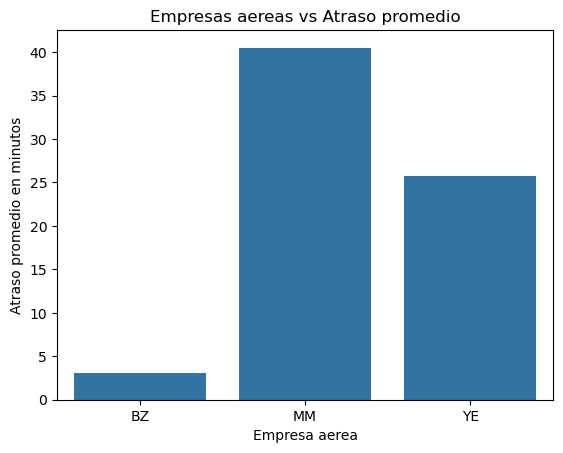

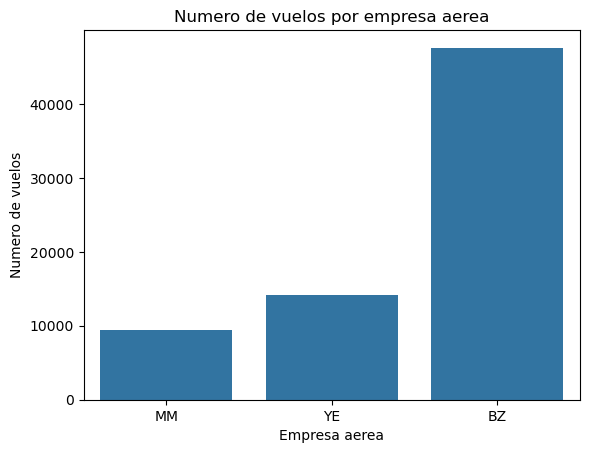

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Empresas aereas segun atraso
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Empresas aereas vs Atraso promedio')
plt.xlabel('Empresa aerea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# numero de vuelos por empresa aerea
sns.countplot(x='airline', data=datos)
plt.title('Numero de vuelos por empresa aerea')
plt.xlabel('Empresa aerea')
plt.ylabel('Numero de vuelos')
plt.show()

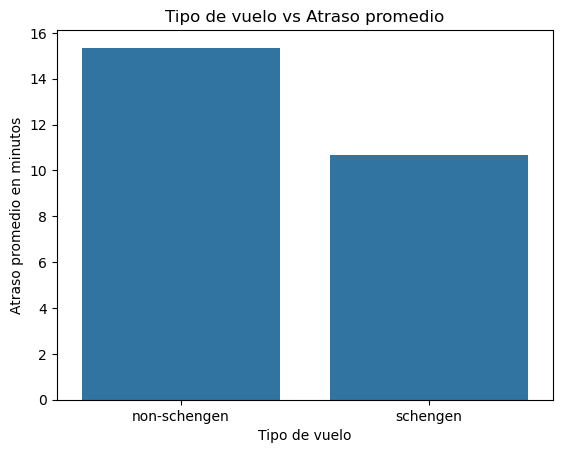

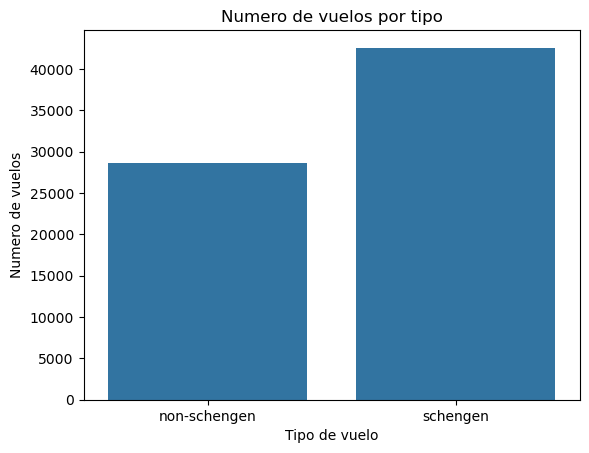

In [7]:
# tipo de vuelo segun atraso
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# numero de vuelos por tipo
sns.countplot(x='schengen', data=datos)
plt.title('Numero de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vuelos')
plt.show()

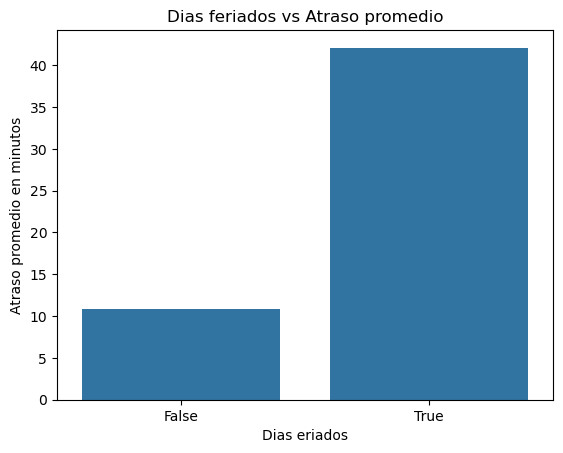

In [8]:
# atraso segun dias feriados
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs Atraso promedio')
plt.xlabel('Dias eriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

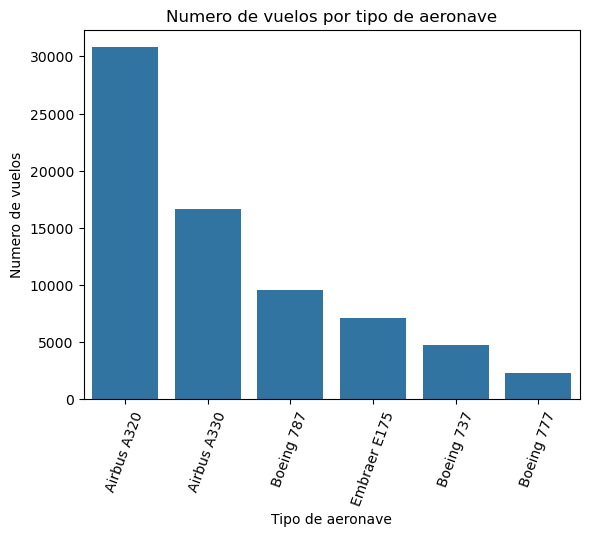

In [9]:
# obtener aeronaves en orden descendente
order = datos['aircraft_type'].value_counts().index

# numero de vuelos por tipo
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Numero de vuelos por tipo de aeronave')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vuelos')
plt.xticks(rotation=70)
plt.show()

## Analisis de distribucion de los datos

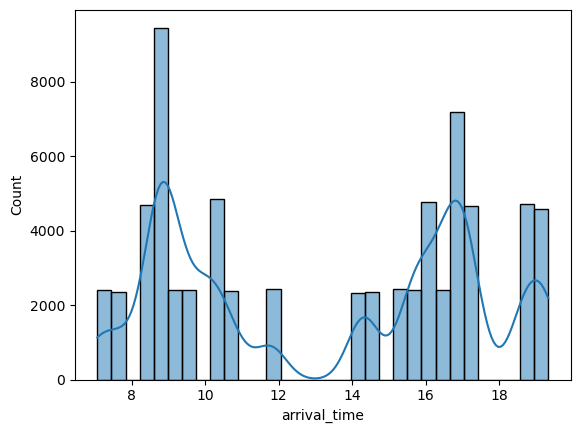

In [10]:
sns.histplot(data=datos, x='arrival_time', kde=True);

In [11]:
# definir ancho del bins con la regla Freedman
import numpy as np

def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75,25])
    iqr = q75 - q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

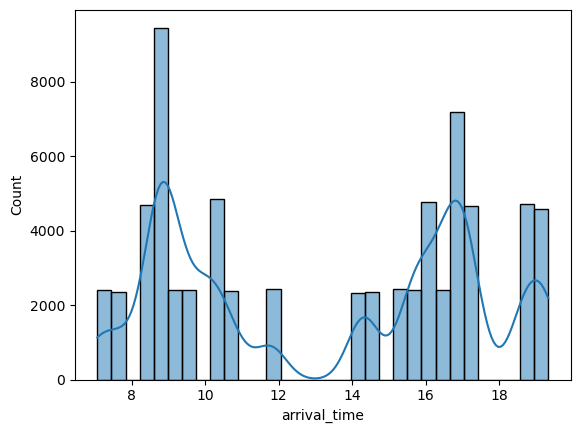

In [12]:
# histograma con los bins calculado
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth);

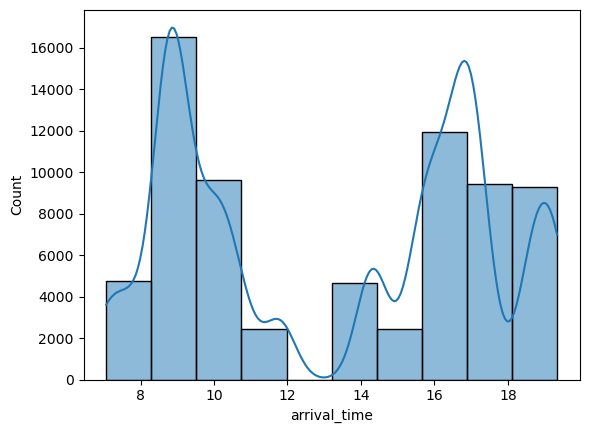

In [13]:
# histogramas con valores de bins dados manualmente
sns.histplot(data=datos, x='arrival_time', kde=True, bins=10);

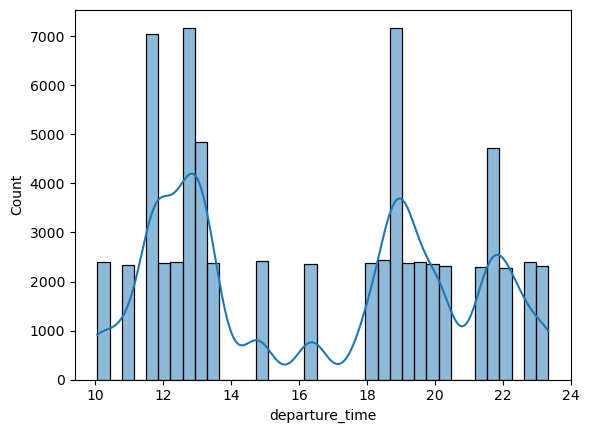

In [14]:
# histograma para el horario de salida con los bins calculado
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth);

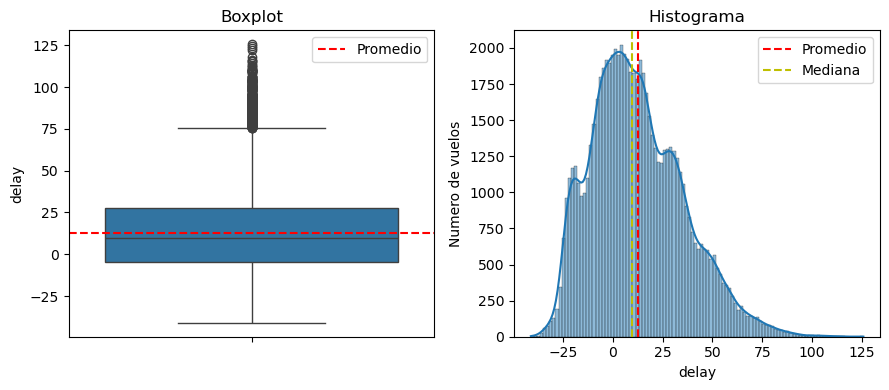

In [15]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()


binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## Creando nuevas features

In [16]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [17]:
# crear columna fecha a partir de day y year
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-1
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-1
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-1


In [18]:
# convertimos date a tipo fecha
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [19]:
# crear columna para clasificar los dias que son fines de semana
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
42145,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,254,2017,False,-11.863869,2017-09-12,False,Tuesday
29802,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,161,2015,False,30.657587,2015-06-11,False,Thursday
45666,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,124,2018,False,39.047564,2018-05-05,True,Saturday
40848,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,168,2017,False,0.859083,2017-06-18,True,Sunday
23066,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,77,2014,False,23.531317,2014-03-19,False,Wednesday


## Feature encoding

In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [21]:
# omite la visualizacion de advertencias
import warnings

warnings.filterwarnings('ignore')

In [22]:
# convertir variables bicateogricas a binarias
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
50780,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,100,2019,0,4.209444,2019-04-11,0,Thursday
59843,22,YE,Airbus A320,0,MWL,8.794147,11.794147,339,2020,0,22.686943,2020-12-05,1,Saturday
66520,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,54,2022,0,-9.344629,2022-02-24,0,Thursday


In [25]:
# convertir variables cateogricas a numericas
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

datos_cod = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_cod.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
69821,20,1,16.909690,18.909690,274,2022,0,0.265204,2022-10-02,1,...,0,0,0,0,0,0,1,0,0,0
66649,25,0,19.341235,23.341235,63,2022,0,45.850886,2022-03-05,1,...,0,0,0,0,0,1,0,0,0,0
51755,14,1,7.708301,11.708301,165,2019,0,-20.911688,2019-06-15,1,...,0,0,1,0,0,1,0,0,0,0
37172,28,0,15.967963,17.967963,288,2016,0,-23.191906,2016-10-15,1,...,0,0,0,0,0,1,0,0,0,0
54320,4,1,11.781391,14.781391,336,2019,0,18.934236,2019-12-03,0,...,1,0,0,0,0,0,0,0,1,0
